In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [18]:
people = pd.read_csv("../data/adult.csv")
df = pd.DataFrame(people)

df = df.replace("?", np.nan).dropna()
df["salary_cleaned"] = df["salary"].str.extract(r"(\d+)").astype(float)

mask_greater = df["salary"].str.startswith(">") & (df["salary K$"] <= df["salary_cleaned"])
mask_less_equal = df["salary"].str.startswith("<=") & (df["salary K$"] > df["salary_cleaned"])
invalid_rows = df[mask_greater | mask_less_equal]

Empty DataFrame
Columns: [Unnamed: 0, age, workclass, education, marital-status, occupation, relationship, race, sex, hours-per-week, native-country, salary, salary K$, salary_cleaned]
Index: []


# Task 1
Print the count of men and women in the dataset.

In [26]:
df["sex"].value_counts().get("Male", 0)
df["sex"].value_counts().get("Female", 0)

9782

# Task 2
Find the average age of men in dataset

In [29]:
male_df = df[df["sex"] == "Male"]
male_df["age"].mean()

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [34]:
count_poland = df[df["native-country"] == "Poland"].shape[0]
total_count = df.shape[0]
percentage_poland = (count_poland / total_count) * 100

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [36]:
df_high_income = df[df["salary"] == ">50K"]
mean_age_high = df_high_income["age"].mean()
std_age_high = df_high_income["age"].std()

df_low_income = df[df["salary"] == "<=50K"]
mean_age_low = df_low_income["age"].mean()
std_age_low = df_low_income["age"].std()

43.95911028236548 10.269632835673852 36.60806038668668 13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [38]:
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
df_no_higher_education = df[~df["education"].isin(higher_education) & (df["salary"] == ">50K")]
df_no_higher_education.empty

False

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [40]:
df.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [50]:
large_salary = df[df["salary"] == ">50K"]
married_men = large_salary[large_salary["marital-status"].str.startswith("Married")].shape[0]
unmarried_men = large_salary[~large_salary["marital-status"].str.startswith("Married")].shape[0]

1068

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [53]:
max_hours = df["hours-per-week"].max()

df[df["hours-per-week"] == max_hours].shape[0]

78

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

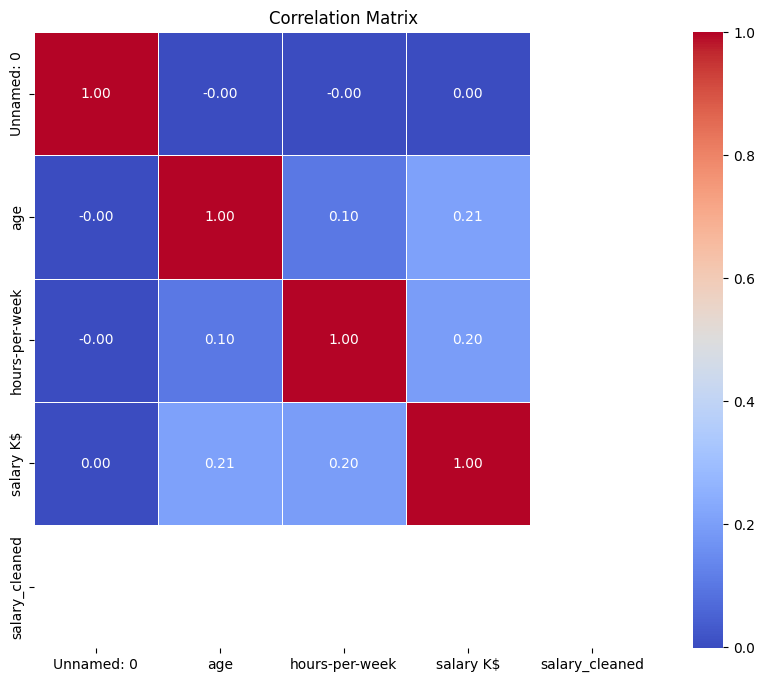

In [58]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()